<a href="https://colab.research.google.com/github/sanket0708/AI_ML_Codes/blob/main/PythonAndDS/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_loss = [0.9, 0.6, 0.5, 0.4, 0.35]
val_loss = [1.0, 0.7, 0.6, 0.5, 0.45]

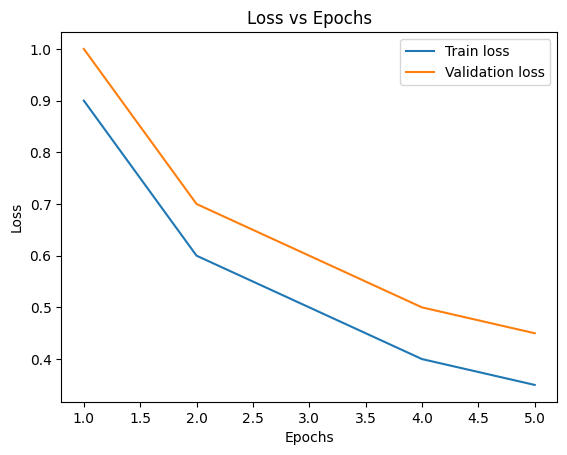

In [12]:
plt.plot(epochs,train_loss,label="Train loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Loss vs Epochs")
# plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() #top right box will display
plt.show()

In [13]:
classes = ['Setosa', 'Versicolor', 'Virginica']
counts = [30, 50, 20]

/tmp/ipython-input-4190890672.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


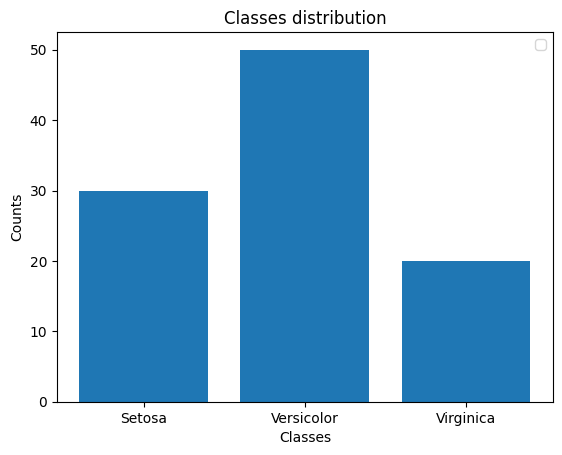

In [16]:
plt.bar(classes,counts)
plt.title("Classes distribution")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [17]:
#seaborn has inbuilt dataset
import seaborn as sns
df = sns.load_dataset("iris")

Text(0.5, 1.0, 'Histogram of sepal_length')

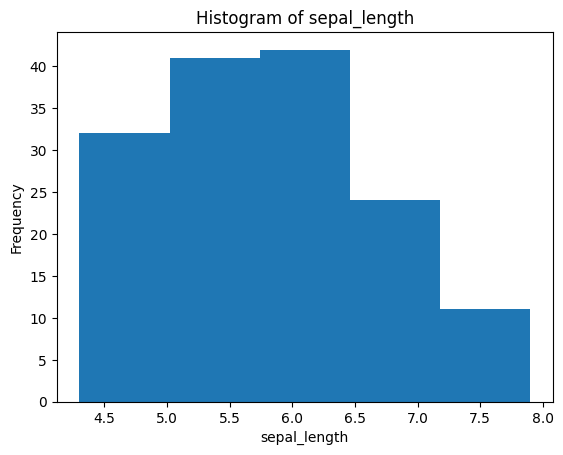

In [23]:
plt.hist(df['sepal_length'],bins=5)
plt.xlabel("sepal_length");
plt.ylabel("Frequency");
plt.title("Histogram of sepal_length")

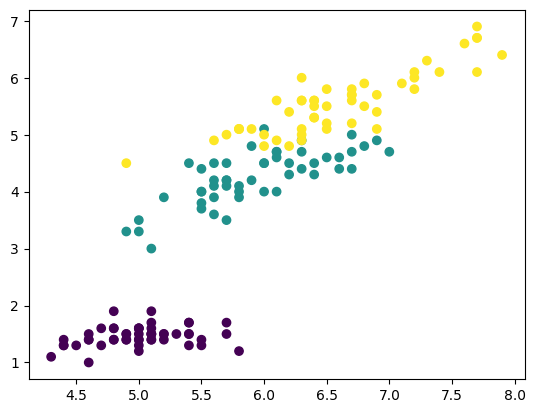

In [24]:
plt.scatter(df['sepal_length'], df['petal_length'], c=df['species'].astype('category').cat.codes)

# ***Playin with titanic dataset ***

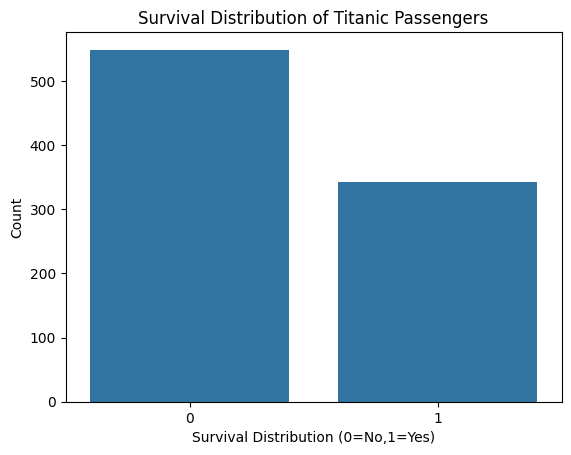

In [31]:
df1 = sns.load_dataset("titanic")
sns.countplot(x='survived',data=df1)
plt.xlabel("Survival Distribution (0=No,1=Yes)")
plt.ylabel("Count")
plt.title("Survival Distribution of Titanic Passengers")
plt.show()

<Axes: xlabel='survived', ylabel='age'>

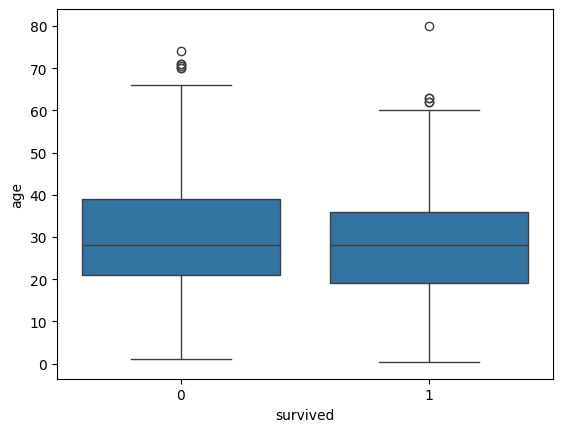

In [32]:
sns.boxplot(x='survived',data=df1,y='age')

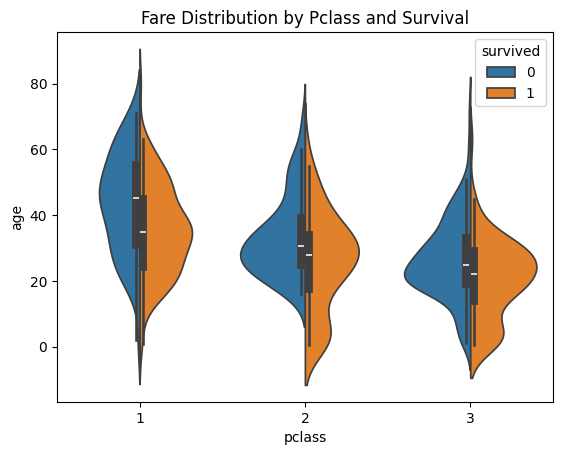

In [36]:
sns.violinplot(x="pclass", y="age", hue="survived", split=True, data=df1)
plt.title("Fare Distribution by Pclass and Survival")
plt.show()

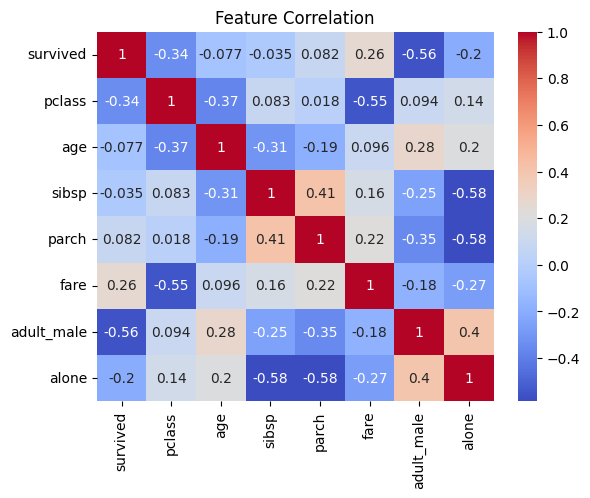

In [37]:
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

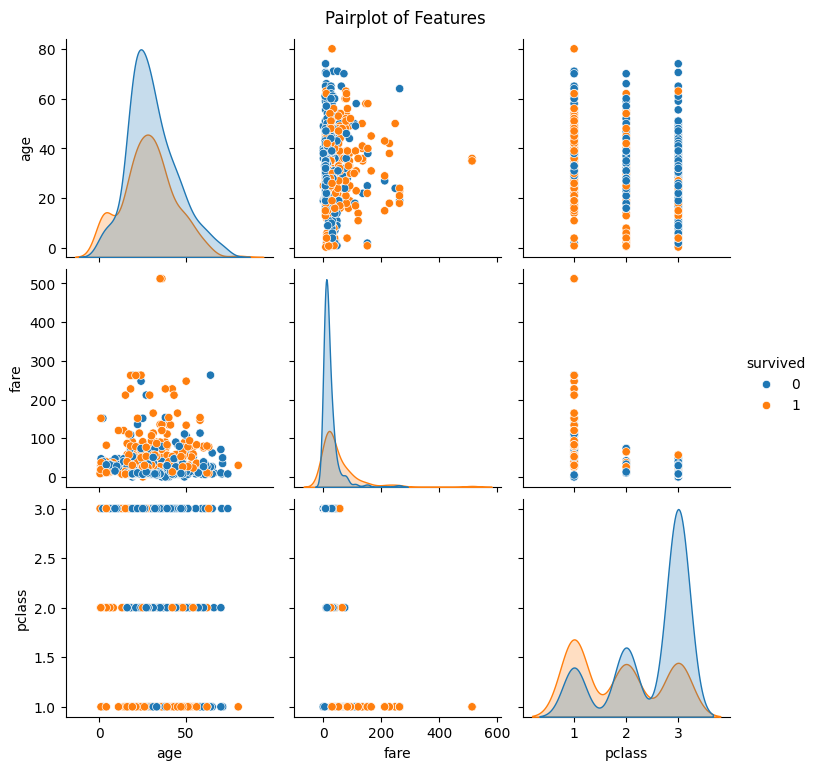

In [38]:
sns.pairplot(df1[["age", "fare", "pclass", "survived"]].dropna(), hue="survived")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [40]:
import plotly.express as px

fig = px.scatter(df1, x="age", y="fare", color="survived", size="pclass",
                 hover_data=['sex', 'embarked'], title="Interactive Titanic Plot")
fig.show()

In [41]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="petal_length")
fig.show()

In [42]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter_3d(
    df,
    x="sepal_width",
    y="sepal_length",
    z="petal_width",
    color="species",
    size="petal_length",
    symbol="species",
    opacity=0.8
)

fig.show()

# EXPLORATORY DATA ANALYSIS

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
#drop less useful and high missing columns
df.drop(columns=['deck','embark_town'],inplace=True)

#fill missing age with median
df['age'].fillna(df['age'].median(),inplace=True)

#fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

#drop rows with any remaining missing values
df.dropna(inplace=True)

#confirm cleanup
df.isna().sum()

/tmp/ipython-input-3543012741.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3543012741.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


Text(0.5, 1.0, 'Survival count')

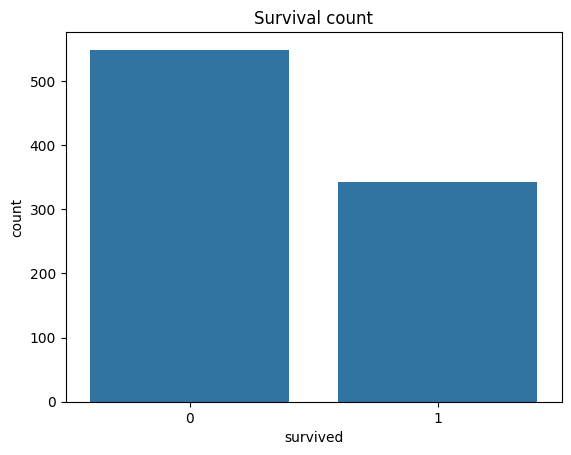

In [49]:
sns.countplot(x='survived',data=df)
plt.title("Survival count")

Text(0.5, 1.0, 'Age distribution')

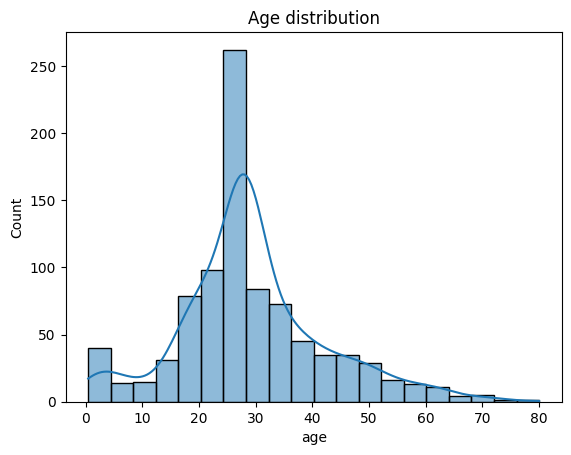

In [51]:
sns.histplot(df['age'],kde=True,bins=20)
plt.title("Age distribution")

<Axes: xlabel='pclass', ylabel='count'>

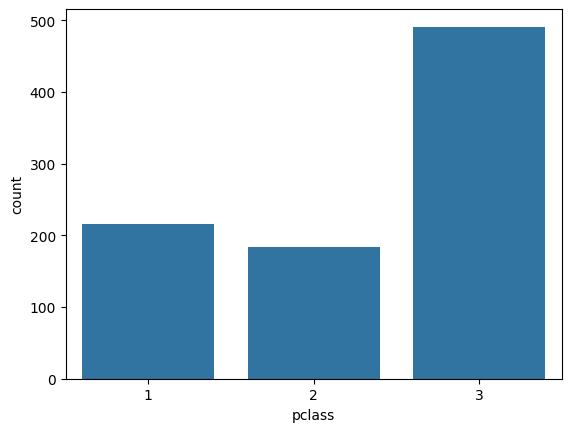

In [52]:
sns.countplot(x='pclass',data=df)

Text(0.5, 1.0, 'Sex distribution')

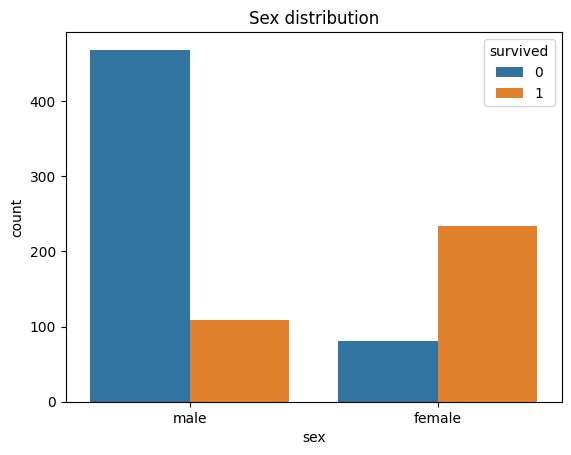

In [55]:
sns.countplot(x='sex',hue='survived',data=df)
plt.title("Sex distribution")
